---
# DCN with Keras
---

# Import Libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [185]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import np_utils

# Load data

In [79]:
from keras.datasets import mnist

In [80]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [81]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

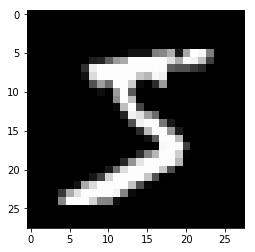

In [82]:
plt.imshow(x_train[0], cmap='gray')

In [83]:
y_train[0]

5

# Data Exploration

In [84]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [91]:
x0_mask = (y_train == 0)
x0 = x_train[x0_mask]

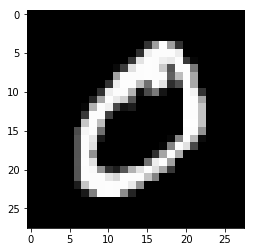

In [94]:
plt.imshow(x0[0], cmap='gray')

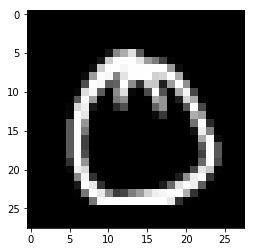

In [95]:
plt.imshow(x0[1000], cmap='gray')

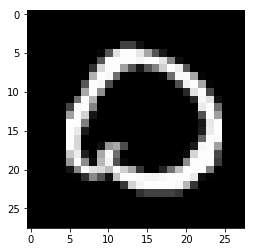

In [96]:
plt.imshow(x0[100], cmap='gray')

# Data Preprocessing

## Add a channel at the end

In [111]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2],1))

In [112]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## Normalize

In [113]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

In [114]:
x_train = x_train / 255
x_test = x_test / 255

## Categorical Labels

In [115]:
y_train.shape, y_train[0]

((60000,), 5)

In [116]:
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [117]:
y_train.shape, y_train[0]

((60000, 10), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

# Build Model

In [118]:
from keras.applications import vgg16
from keras.layers import Input
from keras.models import Model
from keras.optimizers import SGD

In [119]:
inputs = Input((28,28,1))
x = Flatten()(inputs)
x = Dense(units=1000, activation='relu')(x)
x = Dense(units=100, activation='relu')(x)
predictions = Dense(10,activation='softmax')(x)

In [120]:
learner = Model(inputs=inputs, outputs=predictions)
learner.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 886,110
Trainable params: 886,110
Non-trainable params: 0
_________________________________________________________________


In [121]:
sgd = SGD()
learner.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [122]:
learner.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 44us/step - loss: 1.1583 - acc: 0.7445 - val_loss: 0.5537 - val_acc: 0.8740
Epoch 2/10
48000/48000 [==============================] - 2s 37us/step - loss: 0.4791 - acc: 0.8817 - val_loss: 0.3821 - val_acc: 0.9003
Epoch 3/10
48000/48000 [==============================] - 2s 37us/step - loss: 0.3767 - acc: 0.8996 - val_loss: 0.3267 - val_acc: 0.9111
Epoch 4/10
48000/48000 [==============================] - 2s 37us/step - loss: 0.3320 - acc: 0.9088 - val_loss: 0.2977 - val_acc: 0.9167
Epoch 5/10
48000/48000 [==============================] - 2s 37us/step - loss: 0.3042 - acc: 0.9163 - val_loss: 0.2751 - val_acc: 0.9223
Epoch 6/10
48000/48000 [==============================] - 2s 37us/step - loss: 0.2837 - acc: 0.9207 - val_loss: 0.2600 - val_acc: 0.9265
Epoch 7/10
48000/48000 [==============================] - 2s 37us/step - loss: 0.2671 - acc: 0.9258 - val_loss: 0.2476 - val_acc

___

In [123]:
model = Sequential()

In [124]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.add(Convolution2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

In [126]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [127]:
model.add(Convolution2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))

In [128]:
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))

In [129]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [130]:
model.add(Flatten())
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [131]:
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=10, activation='softmax'))

In [132]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [133]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [134]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
__________

# Train Model

In [135]:
model.fit(x=x_train, y=y_train, batch_size=32,
          epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 24s 497us/step - loss: 0.1920 - acc: 0.9400 - val_loss: 0.0580 - val_acc: 0.9815
Epoch 2/10
48000/48000 [==============================] - 15s 303us/step - loss: 0.0656 - acc: 0.9808 - val_loss: 0.0356 - val_acc: 0.9893
Epoch 3/10
48000/48000 [==============================] - 14s 302us/step - loss: 0.0515 - acc: 0.9844 - val_loss: 0.0350 - val_acc: 0.9891
Epoch 4/10
48000/48000 [==============================] - 14s 302us/step - loss: 0.0433 - acc: 0.9866 - val_loss: 0.0282 - val_acc: 0.9914
Epoch 5/10
48000/48000 [==============================] - 14s 302us/step - loss: 0.0375 - acc: 0.9882 - val_loss: 0.0315 - val_acc: 0.9914
Epoch 6/10
48000/48000 [==============================] - 15s 302us/step - loss: 0.0341 - acc: 0.9900 - val_loss: 0.0426 - val_acc: 0.9871
Epoch 7/10
48000/48000 [==============================] - 14s 302us/step - loss: 0.0289 - acc: 0.9910 - val_loss: 0.

# Test Model

In [136]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [137]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 108us/step


In [138]:
score, model.metrics_names

([0.02024402244331827, 0.995], ['loss', 'acc'])

In [139]:
y_pred = model.predict(x_test)

In [153]:
y_testl = np.argmax(y_test, axis=1)
x0_mask = (y_testl == 0)
x0 = x_test[x0_mask]

In [157]:
np.argmax(model.predict(x0), axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [146]:
np.exp(y_pred[idx]), y_pred[idx].astype(int), y_test[idx]

(array([1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
        2.7182817, 1.       , 1.       , 1.       ], dtype=float32),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32))

In [86]:
y_pred = y_pred.astype(int)

In [87]:
y_predl = np.argmax(y_pred, axis=1)
y_testl = np.argmax(y_test, axis=1)

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [89]:
accuracy_score(y_testl, y_predl)

0.5178

In [114]:
print(classification_report(y_testl, y_predl))

             precision    recall  f1-score   support

          0       0.17      1.00      0.29       980
          1       1.00      0.28      0.44      1135
          2       1.00      0.72      0.84      1032
          3       1.00      0.46      0.63      1010
          4       1.00      0.77      0.87       982
          5       1.00      0.28      0.44       892
          6       1.00      0.70      0.82       958
          7       1.00      0.20      0.34      1028
          8       1.00      0.61      0.76       974
          9       1.00      0.18      0.30      1009

avg / total       0.92      0.52      0.57     10000



Confusion matrix, without normalization
[[980   0   0   0   0   0   0   0   0   0]
 [819 316   0   0   0   0   0   0   0   0]
 [286   0 746   0   0   0   0   0   0   0]
 [542   0   0 468   0   0   0   0   0   0]
 [223   0   0   0 759   0   0   0   0   0]
 [642   0   0   0   0 250   0   0   0   0]
 [287   0   0   0   0   0 671   0   0   0]
 [819   0   0   0   0   0   0 209   0   0]
 [375   0   0   0   0   0   0   0 599   0]
 [829   0   0   0   0   0   0   0   0 180]]


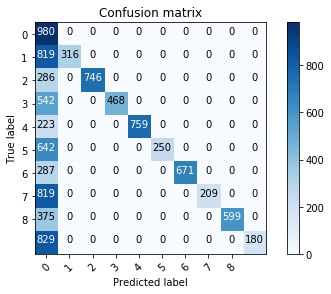

In [93]:
plot_confusion_matrix(confusion_matrix(y_testl, y_predl), classes=range(0,9))

## On train set

In [101]:
score = model.evaluate(x_train, y_train)

60000/60000 [==============================] - 7s 109us/step


In [102]:
score, model.metrics_names

([0.010376558986331141, 0.9970333333333333], ['loss', 'acc'])

In [103]:
y_tpred = model.predict(x_train)

In [104]:
y_tpred = y_tpred.astype(int)

In [106]:
y_tpredl = np.argmax(y_tpred, axis=1)
y_trainl = np.argmax(y_train, axis=1)

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [108]:
accuracy_score(y_trainl, y_tpredl)

0.52965

In [112]:
print(classification_report(y_trainl, y_tpredl))

             precision    recall  f1-score   support

          0       0.17      1.00      0.30      5923
          1       1.00      0.24      0.39      6742
          2       1.00      0.77      0.87      5958
          3       1.00      0.46      0.63      6131
          4       1.00      0.78      0.88      5842
          5       1.00      0.30      0.46      5421
          6       1.00      0.70      0.82      5918
          7       1.00      0.26      0.41      6265
          8       1.00      0.62      0.77      5851
          9       1.00      0.22      0.36      5949

avg / total       0.92      0.53      0.58     60000



Confusion matrix, without normalization
[[5923    0    0    0    0    0    0    0    0    0]
 [5110 1632    0    0    0    0    0    0    0    0]
 [1400    0 4558    0    0    0    0    0    0    0]
 [3289    0    0 2842    0    0    0    0    0    0]
 [1298    0    0    0 4544    0    0    0    0    0]
 [3812    0    0    0    0 1609    0    0    0    0]
 [1802    0    0    0    0    0 4116    0    0    0]
 [4645    0    0    0    0    0    0 1620    0    0]
 [2206    0    0    0    0    0    0    0 3645    0]
 [4659    0    0    0    0    0    0    0    0 1290]]


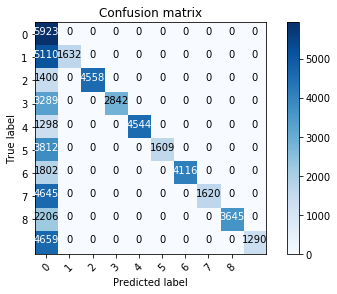

In [110]:
plot_confusion_matrix(confusion_matrix(y_trainl, y_tpredl), classes=range(0,9))

## MLP Model

In [66]:
score = learner.evaluate(x_train, y_train)

60000/60000 [==============================] - 3s 55us/step


In [67]:
score, learner.metrics_names

([0.21609512783189613, 0.9394833333333333], ['loss', 'acc'])

In [68]:
y_tpred = learner.predict(x_train)

In [69]:
y_tpred = y_tpred.astype(int)

In [70]:
y_tpredl = np.argmax(y_tpred, axis=1)
y_trainl = np.argmax(y_train, axis=1)

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [72]:
accuracy_score(y_trainl, y_tpredl)

0.09871666666666666

In [73]:
print(classification_report(y_trainl, y_tpredl))

             precision    recall  f1-score   support

          0       0.10      1.00      0.18      5923
          1       0.00      0.00      0.00      6742
          2       0.00      0.00      0.00      5958
          3       0.00      0.00      0.00      6131
          4       0.00      0.00      0.00      5842
          5       0.00      0.00      0.00      5421
          6       0.00      0.00      0.00      5918
          7       0.00      0.00      0.00      6265
          8       0.00      0.00      0.00      5851
          9       0.00      0.00      0.00      5949

avg / total       0.01      0.10      0.02     60000



/home/ainsteinx/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[5923    0    0    0    0    0    0    0    0    0]
 [6742    0    0    0    0    0    0    0    0    0]
 [5958    0    0    0    0    0    0    0    0    0]
 [6131    0    0    0    0    0    0    0    0    0]
 [5842    0    0    0    0    0    0    0    0    0]
 [5421    0    0    0    0    0    0    0    0    0]
 [5918    0    0    0    0    0    0    0    0    0]
 [6265    0    0    0    0    0    0    0    0    0]
 [5851    0    0    0    0    0    0    0    0    0]
 [5949    0    0    0    0    0    0    0    0    0]]


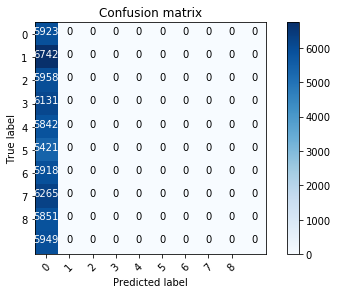

In [76]:
plot_confusion_matrix(confusion_matrix(y_trainl, y_tpredl), classes=range(0,9))

# Final Training

In [159]:
X = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

**Sanity Check**

In [161]:
X.shape, y.shape

((70000, 28, 28, 1), (70000, 10))

In [162]:
y[60000]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

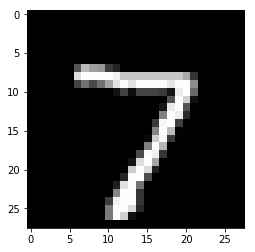

In [163]:
plt.imshow(X[60000,:,:,0], cmap='gray')

**Begin Training**

In [164]:
model.fit(x=X, y=y, batch_size=128, epochs=10)

Epoch 1/10
70000/70000 [==============================] - 10s 138us/step - loss: 0.0184 - acc: 0.9944
Epoch 2/10
70000/70000 [==============================] - 9s 135us/step - loss: 0.0139 - acc: 0.9958
Epoch 3/10
70000/70000 [==============================] - 9s 135us/step - loss: 0.0120 - acc: 0.9963
Epoch 4/10
70000/70000 [==============================] - 10s 136us/step - loss: 0.0121 - acc: 0.9963
Epoch 5/10
70000/70000 [==============================] - 9s 135us/step - loss: 0.0120 - acc: 0.9964
Epoch 6/10
70000/70000 [==============================] - 10s 136us/step - loss: 0.0106 - acc: 0.9967
Epoch 7/10
70000/70000 [==============================] - 9s 135us/step - loss: 0.0115 - acc: 0.9964
Epoch 8/10
70000/70000 [==============================] - 9s 135us/step - loss: 0.0109 - acc: 0.9967
Epoch 9/10
70000/70000 [==============================] - 9s 135us/step - loss: 0.0099 - acc: 0.9970
Epoch 10/10
70000/70000 [==============================] - 9s 135us/step - loss: 0.0103 

---
# Transfer Learning
---

# Load new data

In [165]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Data Preprocessing

**Categorical Targets**

In [166]:
y_train.shape, y_train[0]

((60000,), 9)

In [167]:
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [168]:
y_train.shape, y_train[0]

((60000, 10), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

**Add one channel at the end**

In [169]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

**Train Validation split**

In [170]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.2, random_state = 42)

In [171]:
x_train.shape, x_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

# Data Generators

In [117]:
! mkdir -p ../data/fashionmnist/train
! mkdir -p ../data/fashionmnist/valid
! mkdir -p ../data/fashionmnist/test

In [172]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(horizontal_flip=True)
test_datagen = ImageDataGenerator()

In [174]:
train_gen = train_datagen.flow(x_train, y_train, batch_size=64,
                               save_to_dir='../data/fashionmnist/train/')


In [175]:
val_gen = train_datagen.flow(x_val, y_val, batch_size=64,
                            save_to_dir='../data/fashionmnist/valid/')

In [176]:
train_gen.n, val_gen.n

(48000, 12000)

# Build Model

In [177]:
bmodel = model

In [178]:
bmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [179]:
bmodel.pop()
bmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [180]:
bmodel.pop()
bmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [181]:
bmodel.pop()
bmodel.pop()
bmodel.pop()
bmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
Total para

In [183]:
for layer in bmodel.layers:
    layer.trainable = False

In [184]:
bmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
Total para

In [186]:
x = bmodel.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [188]:
tmodel = Model(inputs=bmodel.input, outputs=predictions)
tmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
__________

In [190]:
tmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluation Before Transfer Learning

In [191]:
from sklearn.metrics import classification_report

In [192]:
test_gen = test_datagen.flow(x_test, y_test, batch_size=64)

In [193]:
test_gen.n

10000

In [194]:
pred0 = tmodel.predict_generator(test_gen, workers=4, use_multiprocessing=True)

In [195]:
y_test.shape, pred0.shape

((10000, 10), (10000, 10))

In [196]:
ytrue = np.argmax(y_test,1)
ypred = np.argmax(pred0,1)

Confusion matrix, without normalization
[[ 10   0   1 315   1 521   3  55   5  89]
 [ 11   0   0 298   0 549   8  44   3  87]
 [  5   0   0 309   0 509   8  63   4 102]
 [  9   0   0 326   0 515   7  56   2  85]
 [  5   0   0 303   0 522   7  54   1 108]
 [  9   0   1 304   1 520   7  51   3 104]
 [  8   0   0 304   0 524   7  58   2  97]
 [  6   0   0 297   0 534   5  52   2 104]
 [ 11   0   0 293   0 524   3  62   3 104]
 [  6   0   1 309   0 499   7  64   2 112]]


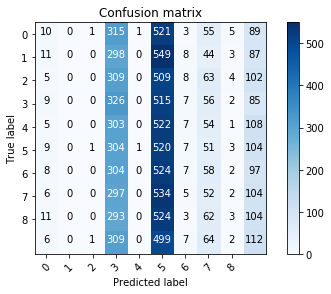

In [200]:
plot_confusion_matrix(confusion_matrix(ytrue, ypred), classes=range(9))

In [201]:
print(classification_report(ytrue, ypred))

             precision    recall  f1-score   support

          0       0.12      0.01      0.02      1000
          1       0.00      0.00      0.00      1000
          2       0.00      0.00      0.00      1000
          3       0.11      0.33      0.16      1000
          4       0.00      0.00      0.00      1000
          5       0.10      0.52      0.17      1000
          6       0.11      0.01      0.01      1000
          7       0.09      0.05      0.07      1000
          8       0.11      0.00      0.01      1000
          9       0.11      0.11      0.11      1000

avg / total       0.08      0.10      0.05     10000



/home/ainsteinx/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Train Model

## Exp #1

In [202]:
tmodel.fit_generator(train_gen, steps_per_epoch = train_gen.n // train_gen.batch_size,
                     epochs=3, workers=4, use_multiprocessing=True,
                     validation_data=val_gen, validation_steps = val_gen.n // val_gen.batch_size)

Epoch 1/3
750/750 [==============================] - 36s 48ms/step - loss: 0.9348 - acc: 0.7083 - val_loss: 0.7641 - val_acc: 0.7365
Epoch 2/3
750/750 [==============================] - 17s 23ms/step - loss: 0.6837 - acc: 0.7585 - val_loss: 0.6473 - val_acc: 0.7742
Epoch 3/3
750/750 [==============================] - 19s 25ms/step - loss: 0.6340 - acc: 0.7709 - val_loss: 0.6070 - val_acc: 0.7901


In [206]:
pred1 = tmodel.predict_generator(test_gen, workers=4, use_multiprocessing=True)

Confusion matrix, without normalization
[[ 87  97  85 106 101  97 124 102 110  91]
 [ 90  93  86 102  82 123 129  99  94 102]
 [ 78  92  90 109  98 113 129  76 114 101]
 [101 103  87  91  94 107 130  99  84 104]
 [ 89  98  91 100 102 127 104  94 104  91]
 [ 77  94  90  94  98 120 124  95  99 109]
 [ 86 104  80 111  92 116 115  92 109  95]
 [113 100  78 105 104  83 137  92 104  84]
 [ 77  98  83 107  95 129 127  95 108  81]
 [ 87  95  98 114 105 115 115  85  88  98]]


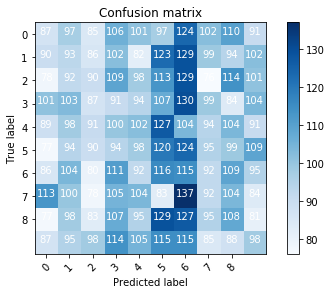

             precision    recall  f1-score   support

          0       0.10      0.09      0.09      1000
          1       0.10      0.09      0.09      1000
          2       0.10      0.09      0.10      1000
          3       0.09      0.09      0.09      1000
          4       0.11      0.10      0.10      1000
          5       0.11      0.12      0.11      1000
          6       0.09      0.12      0.10      1000
          7       0.10      0.09      0.10      1000
          8       0.11      0.11      0.11      1000
          9       0.10      0.10      0.10      1000

avg / total       0.10      0.10      0.10     10000



In [207]:
ytrue = np.argmax(y_test,1)
ypred = np.argmax(pred1,1)
plot_confusion_matrix(confusion_matrix(ytrue, ypred), classes=range(9))
print(classification_report(ytrue, ypred))

## Exp #2

In [209]:
tmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
__________

In [211]:
tmodel.fit_generator(train_gen, steps_per_epoch = train_gen.n // train_gen.batch_size,
                    epochs=5, workers=4, use_multiprocessing=True,
                    validation_data=val_gen, validation_steps = val_gen.n // val_gen.batch_size)

Epoch 1/5
750/750 [==============================] - 16s 22ms/step - loss: 0.6110 - acc: 0.7777 - val_loss: 0.6041 - val_acc: 0.7856
Epoch 2/5
750/750 [==============================] - 19s 25ms/step - loss: 0.5903 - acc: 0.7825 - val_loss: 0.6035 - val_acc: 0.7867
Epoch 3/5
750/750 [==============================] - 19s 25ms/step - loss: 0.5805 - acc: 0.7869 - val_loss: 0.5908 - val_acc: 0.7895
Epoch 4/5
750/750 [==============================] - 22s 29ms/step - loss: 0.5718 - acc: 0.7884 - val_loss: 0.5939 - val_acc: 0.7898
Epoch 5/5
750/750 [==============================] - 20s 27ms/step - loss: 0.5635 - acc: 0.7932 - val_loss: 0.5799 - val_acc: 0.7945


In [214]:
pred2 = tmodel.predict_generator(test_gen, workers=4, use_multiprocessing=True)

Confusion matrix, without normalization
[[114  69 131  95 128  99  49  88 114 113]
 [125  91 123  99 108  99  65  94  88 108]
 [103 107 127  88  95 108  52 106 120  94]
 [121  98 122  97 111  88  46 113 107  97]
 [119  88 127  85 121 104  57  91 122  86]
 [130  97 124 115 100  93  48  91  98 104]
 [134 103 128  96  93  90  46 108 110  92]
 [116  99 126  90  95 107  53 115  88 111]
 [138  93 130 103 102  94  55 101 102  82]
 [101  91 147  83 104 108  62  99  94 111]]


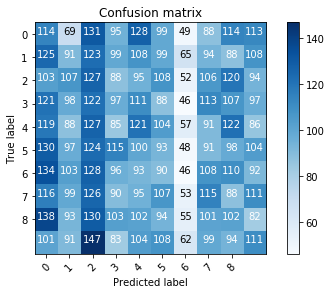

             precision    recall  f1-score   support

          0       0.09      0.11      0.10      1000
          1       0.10      0.09      0.09      1000
          2       0.10      0.13      0.11      1000
          3       0.10      0.10      0.10      1000
          4       0.11      0.12      0.12      1000
          5       0.09      0.09      0.09      1000
          6       0.09      0.05      0.06      1000
          7       0.11      0.12      0.11      1000
          8       0.10      0.10      0.10      1000
          9       0.11      0.11      0.11      1000

avg / total       0.10      0.10      0.10     10000



In [216]:
ytrue = np.argmax(y_test,1)
ypred = np.argmax(pred2,1)
plot_confusion_matrix(confusion_matrix(ytrue, ypred), classes=range(9))
print(classification_report(ytrue, ypred))

In [171]:
from sklearn.metrics import accuracy_score


In [172]:
accuracy_score(ytrue, ypred)

0.0973

In [169]:
score = model.evaluate_generator(generator=test_gen)

In [170]:
score

[3.027038199043274, 0.8098]

**Looking at predictions**

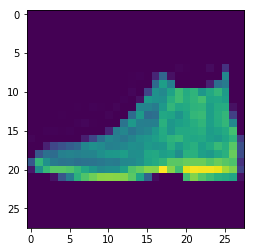

In [176]:
plt.imshow(x_test[0,:,:,0])

In [178]:
ytrue[0:10], ypred[0:10]

(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), array([6, 8, 8, 9, 0, 7, 1, 2, 7, 8]))

In [180]:
val_score = model.evaluate_generator(val_gen)
val_score

[2.959790011882782, 0.814]

## Exp #3

In [179]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

In [181]:
nmodel = model


In [182]:
for layer in nmodel.layers:
    layer.trainable = True

In [183]:
nmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

In [184]:
nmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [185]:
nmodel.fit_generator(train_gen, steps_per_epoch = train_gen.n // train_gen.batch_size,
                    epochs=5, workers=4, use_multiprocessing=True,
                    validation_data=val_gen, validation_steps = val_gen.n // val_gen.batch_size)

Epoch 1/5
1500/1500 [==============================] - 105s 70ms/step - loss: 3.7784 - categorical_accuracy: 0.7630 - val_loss: 3.1644 - val_categorical_accuracy: 0.8028
Epoch 2/5
1500/1500 [==============================] - 105s 70ms/step - loss: 3.9239 - categorical_accuracy: 0.7552 - val_loss: 3.1881 - val_categorical_accuracy: 0.8014
Epoch 3/5
1500/1500 [==============================] - 104s 69ms/step - loss: 3.8814 - categorical_accuracy: 0.7579 - val_loss: 3.3115 - val_categorical_accuracy: 0.7937
Epoch 4/5
1500/1500 [==============================] - 103s 69ms/step - loss: 4.0458 - categorical_accuracy: 0.7481 - val_loss: 3.1915 - val_categorical_accuracy: 0.8008
Epoch 5/5
1500/1500 [==============================] - 104s 70ms/step - loss: 3.8628 - categorical_accuracy: 0.7596 - val_loss: 3.6043 - val_categorical_accuracy: 0.7756
